# What is the most optimal skill to learn for Data Analysts?
Methodology
* Continue from last notebook to find percent of postings with skill
* Visualize median salary vs percent skill demand
* (Optional) Determine if certain technologies are more prevalent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from datasets import load_dataset

# Load the dataset
data = load_dataset("lukebarousse/data_jobs")

# Convert the train split to a pandas DataFrame
df = data["train"].to_pandas()

# Convert job_posted_date to datetime format
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])

# Convert job_skills from string representation of list to actual list
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [2]:
df_DA_US=df[(df['job_title_short']=="Data Analyst") & (df['job_country']=="United States")].dropna(subset='salary_year_avg').copy()

In [3]:
df_DA_US_exploded=df_DA_US.explode('job_skills').copy()

In [4]:
df_DA_skills=df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)

In [5]:
skills_count=len(df_DA_US)
df_DA_skills['percent']=df_DA_skills['count']/skills_count*100

In [6]:
df_plot=df_DA_skills[df_DA_skills['percent']>5]

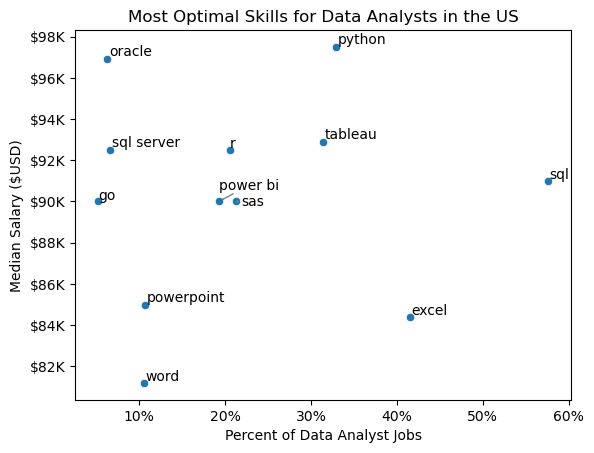

In [7]:
sns.scatterplot(data=df_plot,x='percent',y='median')
text=[]
for i,n in enumerate(df_plot.index):
   text.append(plt.text(x=df_plot['percent'].iloc[i],y=df_plot['median'].iloc[i],s=n))

from adjustText import adjust_text
adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
from matplotlib.ticker import PercentFormatter 
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))

In [8]:
df_technology = df['job_type_skills'].copy()
df_technology = df_technology.drop_duplicates()
df_technology = df_technology.dropna()
technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)  
    for key, value in row_dict.items():
        if key in technology_dict:  
            technology_dict[key] += value
        else:                      
            technology_dict[key] = value

for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))


In [9]:
df_technology = pd.DataFrame(list(technology_dict.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')
df_DA_skills_tech = df_DA_skills.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot2=df_DA_skills_tech[df_DA_skills_tech['percent']> 5]

4 [ 0.88133452 -0.84487637]
5 [0.86843203 0.75733334]


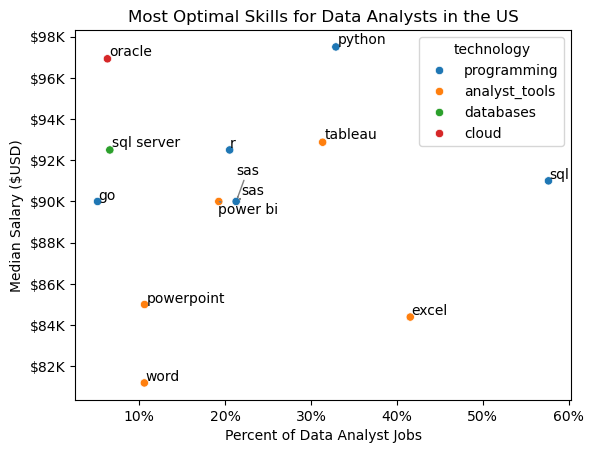

In [10]:
sns.scatterplot(data=df_plot2,x='percent',y='median',hue='technology')
text=[]
for i,n in enumerate(df_plot2['skills']):
   text.append(plt.text(x=df_plot2['percent'].iloc[i],y=df_plot2['median'].iloc[i],s=n))

from adjustText import adjust_text
adjust_text(text, arrowprops=dict(arrowstyle='->', color='gray'))
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis
from matplotlib.ticker import PercentFormatter 
plt.gca().xaxis.set_major_formatter(PercentFormatter(decimals=0))